In [33]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pytube import YouTube
import numpy as np
import math
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


In [68]:
FRAMES_PER_SECOND = 30
FRAME_DIFF = 3

In [6]:
def download_youtube_video(url, path):
    """
    Downloads a YouTube video from the given URL and saves it as an MP4 file.
    
    Args:
    url (str): The URL of the YouTube video.
    path (str): The path where the video will be saved, including the filename.
    
    Returns:
    bool: True if the download was successful, False otherwise.
    """
    try:
        # Create YouTube object
        yt = YouTube(url)
        
        # Select the highest resolution stream available
        stream = yt.streams.filter(file_extension='mp4').get_highest_resolution()
        
        # Download the video
        stream.download(filename=path)
        
        print(f"Video downloaded successfully: {path}")
        return True
    except Exception as e:
        print(f"Failed to download video: {str(e)}")
        return False

# Initialize the video writer.
def setup_video_writer(cap, output_filename='output_video.mp4'):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return cv2.VideoWriter(output_filename, fourcc, fps, (width, height))

# Process each video frame.
def process_video(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    writer = setup_video_writer(cap, output_video_path)
    # Initialize MediaPipe Pose.
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=0) # , model_complexity={0,1,2} (fastest to slowest)

    landmarks = []

    print('Processing video...')
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        
        # Convert the BGR image to RGB.
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        height, width, channels = image.shape
        
        # Make detection.
        results = pose.process(image)

        if (results.pose_landmarks == None):
            continue
        landmarks.append(results.pose_landmarks)
        
        # Draw the pose annotations on the image.
        keypoints = np.zeros((height, width, channels), dtype="uint8")
        
        mp_pose.POSE_CONNECTIONS
        mp_drawing = mp.solutions.drawing_utils
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(keypoints, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Write the frame with annotations.
        writer.write(keypoints)

    cap.release()
    writer.release()

    print (len(landmarks))
    print (landmarks[1000])
    print (type(landmarks))
    return landmarks
    

In [7]:
danceURL = input('Link your desired dance here: ')
filename = input('What are you labeling this file?')
input_path = '../data/{filename}.mp4'
output_path = '../keypoints/{filename}.mp4'
download_youtube_video(danceURL, '../data/{filename}.mp4')
# Example usage:
landmarks = process_video("../data/{filename}.mp4", output_path)

Video downloaded successfully: ../data/{filename}.mp4
Processing video...


I0000 00:00:1713810486.907306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


2443
landmark {
  x: 0.5351125
  y: 0.2998248
  z: -0.20306551
  visibility: 0.99997604
}
landmark {
  x: 0.540521
  y: 0.28668907
  z: -0.19393514
  visibility: 0.99994254
}
landmark {
  x: 0.5438082
  y: 0.2864363
  z: -0.1939709
  visibility: 0.99993545
}
landmark {
  x: 0.5467001
  y: 0.28598738
  z: -0.1939635
  visibility: 0.9999365
}
landmark {
  x: 0.53154665
  y: 0.28653404
  z: -0.18460521
  visibility: 0.99993074
}
landmark {
  x: 0.5291406
  y: 0.28624684
  z: -0.18459734
  visibility: 0.9999155
}
landmark {
  x: 0.52715147
  y: 0.28606588
  z: -0.18459018
  visibility: 0.99992126
}
landmark {
  x: 0.55053294
  y: 0.28823897
  z: -0.12152723
  visibility: 0.9998375
}
landmark {
  x: 0.52560747
  y: 0.28797084
  z: -0.07759668
  visibility: 0.99983263
}
landmark {
  x: 0.5410737
  y: 0.31255564
  z: -0.17523055
  visibility: 0.9999387
}
landmark {
  x: 0.53007674
  y: 0.3119989
  z: -0.16297162
  visibility: 0.99993896
}
landmark {
  x: 0.56778514
  y: 0.3651915
  z: -0.0998

In [15]:
landmarks[0].landmark

[x: 0.45702258
y: 0.33321726
z: 0.042609625
visibility: 0.9835165
, x: 0.45649332
y: 0.32398695
z: 0.031306565
visibility: 0.9831534
, x: 0.4560481
y: 0.32298762
z: 0.031264853
visibility: 0.98183376
, x: 0.45587954
y: 0.3226673
z: 0.03125377
visibility: 0.9856559
, x: 0.45828763
y: 0.32299584
z: 0.030772869
visibility: 0.9694797
, x: 0.45979628
y: 0.3217939
z: 0.030767266
visibility: 0.96304417
, x: 0.46078134
y: 0.32093483
z: 0.030786853
visibility: 0.9658834
, x: 0.45867625
y: 0.32448506
z: -0.007266042
visibility: 0.9620203
, x: 0.46348685
y: 0.3229915
z: -0.008380368
visibility: 0.9358754
, x: 0.45801315
y: 0.34162325
z: 0.031861898
visibility: 0.96821856
, x: 0.4610571
y: 0.34084797
z: 0.031584684
visibility: 0.9496997
, x: 0.4433468
y: 0.3781088
z: -0.004795409
visibility: 0.9989843
, x: 0.48901266
y: 0.37937295
z: -0.0395603
visibility: 0.99732924
, x: 0.4252564
y: 0.4437749
z: -0.035890914
visibility: 0.8567984
, x: 0.5013609
y: 0.44445145
z: -0.043432605
visibility: 0.7749688

In [28]:
def compute_angle_3d(a_ind, b_ind, c_ind, points):
    """
    Compute the angle between three points.
    
    Args:
    a (tuple): The first point.
    b (tuple): The vertex point.
    c (tuple): The third point.
    
    Returns:
    float: The angle in degrees.
    """

    a = points[a_ind]
    b = points[b_ind]
    c = points[c_ind]

    a = [a.x, a.y, a.z]
    b = [b.x, b.y, b.z]
    c = [c.x, c.y, c.z]
    
    a, b, c = np.array(a), np.array(b), np.array(c)
    
    # Create vectors ba and bc
    ab = a - b
    bc = c - b

    # Normalize the vectors
    ab = ab / np.linalg.norm(ab)
    bc = bc / np.linalg.norm(bc)
    
    # Convert the vectors to quaternions
    # The Rotation.from_rotvec function requires a rotation vector, which is a vector along the rotation axis with magnitude equal to the rotation angle.
    # We can create a rotation vector by multiplying the vector by the rotation angle, but in this case, we just want to convert the direction vectors to quaternions, so we can use the vectors directly.
    ab_quaternion = R.from_rotvec(ab).as_quat()
    bc_quaternion = R.from_rotvec(bc).as_quat()
    
    # Compute the quaternion difference
    # The Rotation.inv() function computes the inverse (conjugate) of a quaternion, and the Rotation.__mul__() function multiplies two quaternions.
    quaternion_difference = R.from_quat(ab_quaternion).inv() * R.from_quat(bc_quaternion)
    
    return quaternion_difference.as_quat()

In [65]:
def compute_angular_velocity_2(q1, q2):
    """
    Compute the angular velocity between two quaternions.
    
    Args:
    q1 (np.array): The first quaternion.
    q2 (np.array): The second quaternion.
    
    Returns:
    float: The angular velocity in radians per second.
    """

    dt = float(FRAME_DIFF)/FRAMES_PER_SECOND
    
    # Compute the quaternion difference
    q_diff = R.from_quat(q1).inv() * R.from_quat(q2)
    
    # Convert the quaternion difference to a rotation vector
    rotation_vector = R.from_quat(q_diff.as_quat()).as_rotvec()
    
    # Compute the rotation angle
    rotation_angle = np.linalg.norm(rotation_vector)
    
    # Compute the angular velocity
    angular_velocity = rotation_angle / dt
    
    return angular_velocity

def compute_angular_velocity(q1, q2, q3):
    """
    Compute the angular velocity at q2.
    
    Args:
    q1 (np.array): The quaternion before q2.
    q2 (np.array): The quaternion at which to compute the angular velocity.
    q3 (np.array): The quaternion after q2.
    
    Returns:
    float: The angular velocity at q2 in radians per second.
    """
    
    # Compute the angular velocities
    angular_velocity_12 = compute_angular_velocity_2(q1, q2)
    angular_velocity_23 = compute_angular_velocity_2(q2, q3)
    
    # Compute the average angular velocity
    angular_velocity = (angular_velocity_12 + angular_velocity_23) / 2
    
    return angular_velocity

In [66]:
def compute_velocity(p1, p2, p3):
    """
    Compute the velocity at p2.
    
    Args:
    p1 (np.array): The position before p2.
    p2 (np.array): The position at which to compute the velocity.
    p3 (np.array): The position after p2.
    
    Returns:
    float: The velocity at p2 in meters per second.
    """
    
    dt = float(FRAME_DIFF)/FRAMES_PER_SECOND

    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
   
    # Compute the velocities
    velocity_12 = (p2 - p1) / dt
    velocity_23 = (p3 - p2) / dt
    
    # Compute the average velocity
    velocity = (velocity_12 + velocity_23) / 2
    
    return velocity

In [47]:
pos = []
angles = []

for data_point in landmarks:
    pos_dict = dict()
    angles_dict = dict()
    angle_velocities_dict = dict()

    points = data_point.landmark
    pos_dict["origin"] = [points[0].x, points[0].y, points[0].z]
    pos_dict["right_shoulder"] = [points[12].x, points[12].y, points[12].z]
    pos_dict["left_shoulder"] = [points[11].x, points[11].y, points[11].z]
    pos_dict["right_elbow"] = [points[14].x, points[14].y, points[14].z]
    pos_dict["left_elbow"] = [points[13].x, points[13].y, points[13].z]
    pos_dict["right_hip"] = [points[24].x, points[24].y, points[24].z]
    pos_dict["left_hip"] = [points[23].x, points[23].y, points[23].z]
    pos_dict["right_knee"] = [points[26].x, points[26].y, points[26].z]
    pos_dict["left_knee"] = [points[25].x, points[25].y, points[25].z]
    pos_dict["right_ankle"] = [points[28].x, points[28].y, points[28].z]
    pos_dict["left_ankle"] = [points[27].x, points[27].y, points[27].z]
    pos_dict["right_wrist"] = [points[16].x, points[16].y, points[16].z]
    pos_dict["left_wrist"] = [points[15].x, points[15].y, points[15].z]

    angles_dict["right_shoulder"] = compute_angle_3d(14, 12, 24, points)
    angles_dict["left_shoulder"] = compute_angle_3d(13, 11, 23, points)
    angles_dict["right_elbow"] = compute_angle_3d(16, 14, 12, points)
    angles_dict["left_elbow"] = compute_angle_3d(15, 13, 11, points)
    angles_dict["right_hip"] = compute_angle_3d(12, 24, 26, points)
    angles_dict["left_hip"] = compute_angle_3d(11, 23, 25, points)
    angles_dict["right_knee"] = compute_angle_3d(24, 26, 28, points)
    angles_dict["left_knee"] = compute_angle_3d(23, 25, 27, points)

    pos.append(pos_dict)
    angles.append(angles_dict)


In [69]:
angle_velocities = []
velocities = []

for i in range (FRAME_DIFF, len(angles) - FRAME_DIFF):
    angle_velocities_dict = dict()
    velocities_dict = dict()

    angles_dict = angles[i]
    pos_dict = pos[i]

    for key in angles_dict.keys():
        prev_angle = angles[i - 1][key]
        angle = angles_dict[key]
        next_angle = angles[i + 1][key]
        angle_velocities_dict[key] = compute_angular_velocity(prev_angle, angle, next_angle)       
    angle_velocities.append(angle_velocities_dict)

    for key in pos_dict.keys():
        prev_pos = pos[i - FRAME_DIFF][key]
        curr_pos = pos_dict[key]
        next_pos = pos[i + FRAME_DIFF][key]
        velocities_dict[key] = compute_velocity(prev_pos, curr_pos, next_pos)       
    angle_velocities.append(angle_velocities_dict)
    velocities.append(velocities_dict)

In [32]:
angles[0]

{'right_shoulder': array([-0.11217415,  0.04041993, -0.1560469 ,  0.98052667]),
 'left_shoulder': array([0.07331798, 0.00952328, 0.17712474, 0.98140746]),
 'right_elbow': array([-0.2935927 , -0.58130597, -0.4766978 ,  0.59046244]),
 'left_elbow': array([ 0.17372178, -0.81532198,  0.10650316,  0.54196669]),
 'right_hip': array([0.0856342 , 0.80824737, 0.15207575, 0.56238415]),
 'left_hip': array([0.04582192, 0.83532257, 0.08923623, 0.54053072]),
 'right_knee': array([0.02483831, 0.7377389 , 0.38982741, 0.55059873]),
 'left_knee': array([0.06602544, 0.83489382, 0.08110089, 0.54038468])}

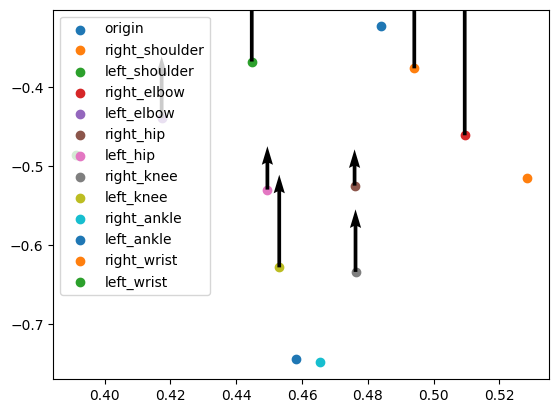

In [52]:
fig, ax = plt.subplots()

for key, value in pos[10].items():
    ax.scatter(value[0], -value[1], label=key)

    # If the key is in angular_velocities[10], plot an arrow
    if key in angle_velocities[10]:
        # The arrow's x and y components are 0, and the length is proportional to the angular velocity
        ax.quiver(value[0], -value[1], 0, angle_velocities[10][key], scale=20)

ax.legend()
plt.show()

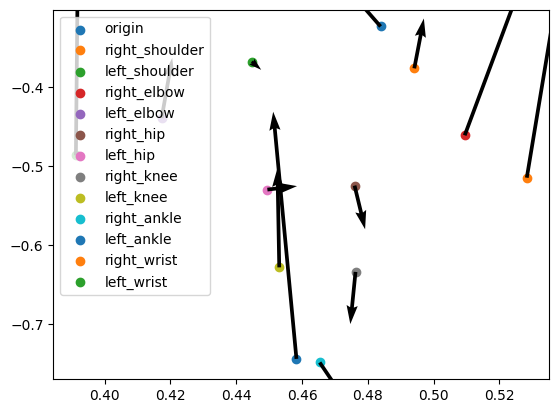

In [70]:
fig, ax = plt.subplots()

for key, value in pos[10].items():
    ax.scatter(value[0], -value[1], label=key)

    # If the key is in angular_velocities[10], plot an arrow
    if key in velocities[10]:
        # The vector's x and y components are given by velocities[10][key]
        ax.quiver(value[0], -value[1], 50*velocities[10][key][0], -50*velocities[10][key][1], scale=10)


ax.legend()
plt.show()

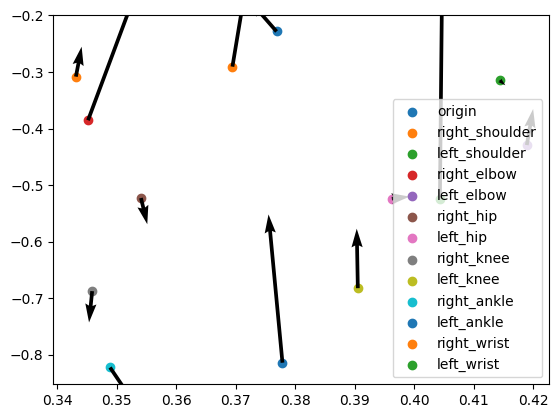

In [74]:
fig, ax = plt.subplots()

for key, value in pos[15*33].items():
    ax.scatter(value[0], -value[1], label=key)

    # If the key is in angular_velocities[10], plot an arrow
    if key in velocities[15*33]:
        # The vector's x and y components are given by velocities[10][key]
        ax.quiver(value[0], -value[1], 30*velocities[10][key][0], -30*velocities[10][key][1], scale=10)


ax.legend()
plt.show()